In [3]:
import pandas as pd
df = pd.read_csv("../Data set/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [10]:
predict_y = model.predict(xtest)
# check accuracy

from sklearn.metrics import r2_score
r2_score(ytest, predict_y)

0.8588877328994488

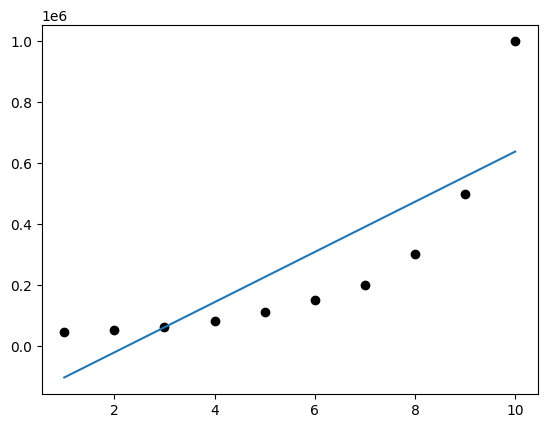

In [11]:
# visulazing data
import matplotlib.pyplot as plt
plt.scatter(x, y, color="black")
plt.plot(x, model.predict(x))

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [31]:
y_pred = model.predict(x_poly)
print(y_pred)

[ 53356.64335675  31759.90675984  58642.1911421   94632.86713282
 121724.94172495 143275.05827509 184003.49650352 289994.17249417
 528694.63869462 988916.08391612]


In [32]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9973922891706614

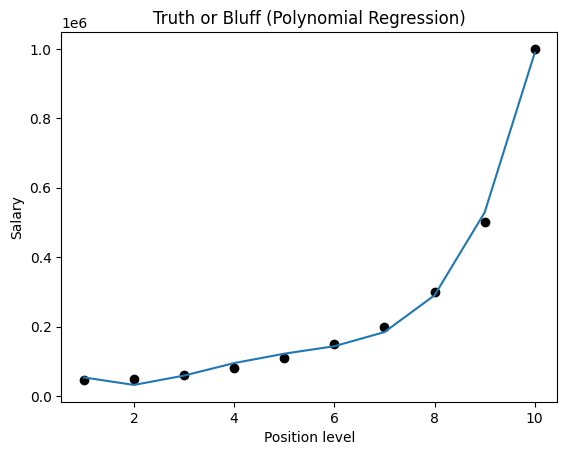

In [34]:
# visulazing data

plt.scatter(x, y, color="black")
plt.plot(x, model.predict(x_poly))
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()